# These are the Cartography visuals.

# To Do:
- make HA only and HA + NA sections, get snakemake notebook_docs folder ready

# Imports Section 

In [213]:
import sys
sys.path.append("../notebooks/scripts/")

In [214]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive
from Helpers import get_y_positions

%matplotlib inline

In [215]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [216]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [217]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [218]:
try:
    node_df = snakemake.input.node_df

    pca_df = snakemake.input.pca_df
    explained_variance_pca = snakemake.input.explained_variance_pca

    mds_df = snakemake.input.mds_df

    #Scatterplot:
    scatterplot_pca = snakemake.input.scatterplot_pca
    scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

    scatterplot_mds = snakemake.input.scatterplot_mds
    scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

    scatterplot_tsne = snakemake.input.scatterplot_tsne
    scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

    scatterplot_umap = snakemake.input.scatterplot_umap
    scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata = snakemake.input.KDE_pca_metadata

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata = snakemake.input.KDE_mds_metadata

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata = snakemake.input.KDE_tsne_metadata

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata = snakemake.input.KDE_umap_metadata
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata = snakemake.input.KDE_genetic_metadata
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [219]:
clades_to_plot = ['3c2', '3c2.A', '3c3.A', 'A1','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3'] 
domain =   ['3c2', '3c2.A', '3c3.A', 'A1','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A1b/137F', 'A1b/186D', 'A1b/197R', 'A1b/94N', 'A2', 'A2/re', 'A3'] 
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36']

# Reading in all the data from the scripts

In [220]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/ha-na-nextstrain'

In [222]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df = pd.read_csv("results/table.tsv", sep="\t")

In [223]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [224]:
node_df.head()

strain     date  pca1  pca2  pca3  pca4  \
0  A/environment/Indiana/16TOSU3546/2016  2016.42  3.33 -0.16 -1.24  0.16   
1            A/Guangdong/YueFang277/2017  2017.25  4.19  0.38 -0.65 -0.63   
2  A/environment/Indiana/16TOSU3843/2016  2016.50  3.86  0.41  0.11  0.15   
3                A/MUWRP-Uganda/579/2016  2016.67  4.91  1.18 -0.48 -0.11   
4                       A/Sydney/29/2016  2016.03  6.51  1.09 -0.51 -0.35   

    mds1    mds2  tsne_x  tsne_y  umap_x  umap_y clade_membership  pca_label  \
0  78.79  188.49  -11.52   -1.25   20.46    4.10       unassigned         -1   
1  54.79  107.74  -11.84   -0.69   20.10    4.29         A1b/137F         -1   
2  45.99   74.87  -10.70   -0.71   19.68    4.17       unassigned         -1   
3  35.79  -17.32  -11.94    7.53   20.25    4.17              3c3         -1   
4  35.59   -0.36  -14.30    4.84   21.15    4.13              3c3         -1   

   mds_label  umap_label  t-sne_label  y  
0         -1           3           -1  1  
1         -1           3            9  2  
2         -1           3           -1  3  
3         -1           3           18  4  
4          0           3           -1  5

In [225]:
# Reannotate clades that we aren't interested in as "other" to simplify color assignment in visualizations.
try:
    node_df["clade_membership_color"] = node_df["clade_membership"].apply(lambda clade: clade if clade in clades_to_plot else "other")
except:
    node_df["clade_membership_color"] = node_df["clade_membership"]
    print("clades_to_plot undefined")

# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [226]:
#principalDf = pd.read_csv(pca_df, index_col=0)
principalDf_ha = pd.read_csv("results/embed_pca_ha.csv", index_col=0)
principalDf_concatenated = pd.read_csv("results/embed_pca_concatenated.csv", index_col=0)

In [227]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df_ha = pd.read_csv("results/explained_variance_pca_ha.csv")
explained_variance_df_concatenated = pd.read_csv("results/explained_variance_pca_concatenated.csv")
explained_variance_df

explained variance  principal components
0              0.2564                     1
1              0.2218                     2
2              0.0841                     3
3              0.0608                     4
4              0.0308                     5
5              0.0259                     6
6              0.0166                     7
7              0.0148                     8
8              0.0132                     9
9              0.0127                    10

Text(0.5, 1.0, 'Explained Variance Plot (Flu)')

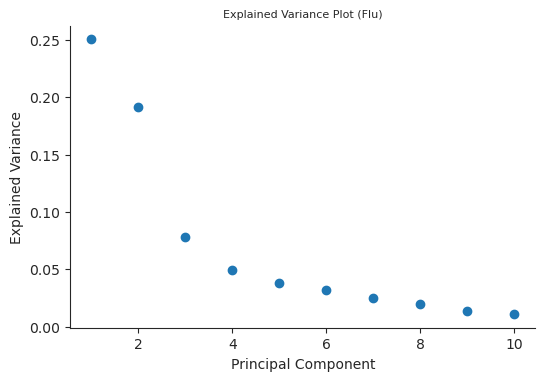

In [228]:
plt.plot(explained_variance_df_ha['principal components'].values.tolist(), explained_variance_df_ha["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu)")

#plt.savefig(snakemake.output.Explained_variance_PCA)

In [229]:
merged_pca_df_ha = principalDf_ha.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")
merged_pca_df_concatenated = principalDf_concatenated.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [230]:
explained_variance_PCA_ha = explained_variance_df_ha["explained variance"].values.tolist()
explained_variance_PCA_concatenated = explained_variance_df_concatenated["explained variance"].values.tolist()

In [231]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_pca_df_ha,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_ha[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)

list_of_chart_concatenated = linking_tree_with_plots_brush(merged_pca_df_concatenated,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA_concatenated[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush_ha = list_of_chart_ha[0]|list_of_chart_ha[1]|list_of_chart_ha[2]
PCAFluBrush_concatenated = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]|list_of_chart_concatenated[2]

alt.vconcat(PCAFluBrush_ha,PCAFluBrush_concatenated)
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.VConcatChart(...)

# Running MDS on the Dataset

In [232]:
#MDS_df = pd.read_csv(mds_df,index_col=0)
MDS_df_ha = pd.read_csv("results/embed_mds_ha.csv",index_col=0)
MDS_df_concatenated = pd.read_csv("results/embed_mds_concatenated.csv",index_col=0)

In [233]:
merged_mds_df_ha = MDS_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_mds_df_concatenated = MDS_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [234]:
merged_mds_df_ha

strain       mds1        mds2  mds_label  \
0     A/environment/Indiana/16TOSU3546/2016  78.794690  188.489773         -1   
1                         A/Alabama/01/2017  12.077438    0.544902          5   
2                        A/Colorado/49/2016  12.001626    0.668106          5   
3                    A/Pennsylvania/93/2016  11.044395    0.502320          5   
4                        A/Delaware/07/2017  12.038986    0.629986          5   
...                                     ...        ...         ...        ...   
1643                       A/Texas/305/2017  42.559006   -5.001465          0   
1644                A/RobatKarim/21210/2016  16.425874    9.584004         -1   
1645                A/MUWRP-Uganda/579/2016  35.793418  -17.318709         -1   
1646  A/environment/Indiana/16TOSU3843/2016  45.986694   74.874949         -1   
1647            A/Guangdong/YueFang277/2017  54.790859  107.740361         -1   

         date    y clade_membership clade_membership_color  
0     2016.42    1       unassigned                  other  
1     2017.01  325               A3                     A3  
2     2016.98  322               A3                     A3  
3     2016.86  323               A3                     A3  
4     2017.09  328               A3                     A3  
...       ...  ...              ...                    ...  
1643  2017.91   11            3c3.A                  3c3.A  
1644  2016.05  213              3c3                  other  
1645  2016.67    4              3c3                  other  
1646  2016.50    3       unassigned                  other  
1647  2017.25    2         A1b/137F               A1b/137F  

[1648 rows x 8 columns]

In [235]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_34_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds3','mds4',"mds3","mds4",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_56_mds = scatterplot_with_tooltip_interactive(merged_mds_df_ha,'mds5','mds6',"mds5","mds6",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_12_mds|chart_34_mds|chart_56_mds

ValueError: mds3 encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.HConcatChart(...)

In [236]:
list_of_chart_ha = linking_tree_with_plots_brush(merged_mds_df_ha,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_ha = list_of_chart_ha[0]|list_of_chart_ha[1]
list_of_chart_concatenated = linking_tree_with_plots_brush(merged_mds_df_concatenated,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart_concat = list_of_chart_concatenated[0]|list_of_chart_concatenated[1]
alt.vconcat(chart_ha, chart_concat)

alt.VConcatChart(...)

# Running T-SNE on the Dataset 

In [237]:
TSNE_df_ha = pd.read_csv("results/embed_t-sne_ha.csv",index_col=0)
TSNE_df_concatenated = pd.read_csv("results/embed_t-sne_concatenated.csv",index_col=0)

In [238]:
merged_tsne_df_ha = TSNE_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_tsne_df_concatenated = TSNE_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [239]:
scatterplot_with_tooltip_interactive(merged_tsne_df_ha,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [240]:
scatterplot_with_tooltip_interactive(merged_tsne_df_concatenated,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [241]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df_ha,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

In [242]:
list_of_chart = linking_tree_with_plots_brush(
    merged_tsne_df_concatenated,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

# Running UMAP on the Dataset

In [243]:
UMAP_df_ha = pd.read_csv("results/embed_umap_ha.csv",index_col=0)
UMAP_df_concatenated = pd.read_csv("results/embed_umap_concatenated.csv",index_col=0)

In [244]:
UMAP_df_concatenated

umap_x     umap_y  umap_label
strain                                                                
A/environment/Indiana/16TOSU3546/2016 -2.601906   0.090664           4
A/Alabama/01/2017                     -1.121620  11.429608           1
A/Colorado/49/2016                    -1.242176  11.835285           1
A/Pennsylvania/93/2016                -1.179688  12.199342           1
A/Delaware/07/2017                    -1.186138  11.468295           1
...                                         ...        ...         ...
A/Texas/305/2017                      -4.588334   1.496897           4
A/RobatKarim/21210/2016                4.291354   2.232394           5
A/MUWRP-Uganda/579/2016               -4.061432   1.333852           4
A/environment/Indiana/16TOSU3843/2016 -2.543614  -0.016538           4
A/Guangdong/YueFang277/2017           -2.557356   0.156359           4

[1648 rows x 3 columns]

In [245]:
merged_umap_df_ha = UMAP_df_ha.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")
merged_umap_df_concatenated = UMAP_df_concatenated.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [246]:
merged_umap_df_ha

strain     umap_x    umap_y  umap_label  \
0     A/environment/Indiana/16TOSU3546/2016  20.459421  4.101433           3   
1                         A/Alabama/01/2017  -0.705072 -9.756170           4   
2                        A/Colorado/49/2016  -0.879901 -9.786559           4   
3                    A/Pennsylvania/93/2016  -1.374355 -9.615820           4   
4                        A/Delaware/07/2017  -0.811076 -9.855755           4   
...                                     ...        ...       ...         ...   
1643                       A/Texas/305/2017  18.813223  4.563687           3   
1644                A/RobatKarim/21210/2016  -0.779205 -8.088953           4   
1645                A/MUWRP-Uganda/579/2016  20.254585  4.171931           3   
1646  A/environment/Indiana/16TOSU3843/2016  19.677862  4.170068           3   
1647            A/Guangdong/YueFang277/2017  20.104492  4.287076           3   

         date    y clade_membership clade_membership_color  
0     2016.42    1       unassigned                  other  
1     2017.01  325               A3                     A3  
2     2016.98  322               A3                     A3  
3     2016.86  323               A3                     A3  
4     2017.09  328               A3                     A3  
...       ...  ...              ...                    ...  
1643  2017.91   11            3c3.A                  3c3.A  
1644  2016.05  213              3c3                  other  
1645  2016.67    4              3c3                  other  
1646  2016.50    3       unassigned                  other  
1647  2017.25    2         A1b/137F               A1b/137F  

[1648 rows x 8 columns]

In [247]:
scatterplot_with_tooltip_interactive(merged_umap_df_ha,'umap_x','umap_y','umap_x','umap_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [248]:
scatterplot_with_tooltip_interactive(merged_umap_df_concatenated,'umap_x','umap_y','umap_x','umap_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [249]:
list_of_chart = linking_tree_with_plots_brush(
    merged_umap_df_ha,
    ['umap_x','umap_y'],
    ['umap_x','umap_y'],
    'clade_membership:N',
    ["strain:N", "clade_membership:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap

alt.HConcatChart(...)

# Linking all plots together clickable with Tree

In [250]:
#merged_df = node_df.merge(
#    PrincipalDf_concatenated.merge)
merged_df = node_df[["strain", "date", "y", "clade_membership"]].merge(
    principalDf_concatenated,
    on="strain"
).merge(
    MDS_df_concatenated,
    on="strain"
).merge(
    TSNE_df_concatenated,
    on="strain"
).merge(
    UMAP_df_concatenated,
    on="strain"
)

In [251]:
merged_df

strain     date     y clade_membership  \
0     A/environment/Indiana/16TOSU3546/2016  2016.42     1       unassigned   
1               A/Guangdong/YueFang277/2017  2017.25     2         A1b/137F   
2     A/environment/Indiana/16TOSU3843/2016  2016.50     3       unassigned   
3                   A/MUWRP-Uganda/579/2016  2016.67     4              3c3   
4                          A/Sydney/29/2016  2016.03     5              3c3   
...                                     ...      ...   ...              ...   
1643                     A/Linkou/0186/2016  2016.98  1644              A1b   
1644                       A/Alaska/08/2017  2017.12  1645              A1b   
1645                     A/Arkansas/14/2017  2017.14  1646              A1b   
1646                       A/Alaska/12/2017  2017.24  1647              A1b   
1647                       A/Texas/104/2017  2017.25  1648              A1b   

          pca1      pca2      pca3      pca4      pca5      pca6  ...  \
0     4.379163 -0.656098 -0.072433 -1.350713  1.200161 -0.304744  ...   
1     5.080663  0.163709 -0.299375  2.298821  2.475379 -0.869138  ...   
2     4.706667  0.071899 -0.240435 -1.258063  0.467336 -0.057049  ...   
3     5.951091  0.753906 -0.862636 -0.229497 -0.242099  0.061286  ...   
4     6.790967  0.479324 -0.556711  2.084195  2.557854  1.100194  ...   
...        ...       ...       ...       ...       ...       ...  ...   
1643 -0.821149 -2.866749 -1.752169 -2.244540  1.248120 -0.640551  ...   
1644 -0.955381 -3.076322 -2.174595 -2.626921  1.479474 -0.743753  ...   
1645 -0.848938 -3.125910 -1.918799 -2.663725  1.510024 -0.873379  ...   
1646 -0.951991 -3.069948 -2.167719 -2.622845  1.475200 -0.743252  ...   
1647 -0.868947 -2.983581 -1.803416 -2.704774  1.563286 -0.810079  ...   

      pca_label        mds1        mds2  mds_label     tsne_x     tsne_y  \
0            -1  121.283347  305.506011         -1 -33.704403  16.570652   
1            -1  153.803324  148.126922         -1   8.031030 -59.770650   
2            -1  204.625779  -28.385726         -1 -33.717854  16.587616   
3            -1   63.835114  -12.534970          0   8.401155 -63.577430   
4            -1   57.459315    0.640000          0   9.164047 -56.284824   
...         ...         ...         ...        ...        ...        ...   
1643          8  -17.155760   15.906717          9 -15.768675 -37.047558   
1644          8  -21.545497   16.964603          9 -18.582975 -44.739357   
1645          8  -19.375884   17.322131          9 -18.049599 -44.188164   
1646          8  -22.977807   17.634223          9 -18.494410 -44.959460   
1647          8  -20.102453   18.098481          9 -18.806097 -43.855854   

      t-sne_label    umap_x     umap_y  umap_label  
0               4 -2.601906   0.090664           4  
1               5 -2.557356   0.156359           4  
2               4 -2.543614  -0.016538           4  
3               5 -4.061432   1.333852           4  
4               5 -3.460035   0.953395           4  
...           ...       ...        ...         ...  
1643           20  8.965593 -11.155348           3  
1644           19  8.389705 -11.890671           3  
1645           19  8.677156 -11.651093           3  
1646           19  8.595972 -12.484226           3  
1647           19  8.488082 -11.948039           3  

[1648 rows x 24 columns]

In [252]:
data = linking_tree_with_plots_brush(
    node_df.merge(merged_df[["strain"]], on="strain"),
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [253]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableFluHA.html")
#fullChart.save("../docs/FullLinkedChartBrushableFluHA.png")
#save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

alt.VConcatChart(...)

In [254]:
filtered_merged_df = merged_df[merged_df["pca1"] < 10].copy()

In [255]:
filtered_merged_df.shape

(1648, 24)

In [256]:
merged_df.shape

(1648, 24)

In [257]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca3', 'pca4', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA3 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[2]*100,2)) + ")",
    'PCA4 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[3]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain', 'clade_membership'],
    domain,
    range_
)

In [258]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableFluHA.html")
#fullChart.save("../docs/FullLinkedChartBrushableFluHA.png")
#save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

alt.VConcatChart(...)

# Final Chart

In [265]:
merged_df.columns = ['strain', 'date', 'y', 'clade_membership', 'pca1', 'pca2', 'pca3',
       'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca_label',
       'mds1', 'mds2', 'mds_label', 'tsne_x', 'tsne_y', 't-sne_label', 'umap_x',
       'umap_y', 'umap_label']

In [266]:
node_df.columns = ['strain', 'date_ha', 'pca1_ha', 'pca2_ha', 'pca3_ha', 'pca4_ha', 'mds1_ha', 'mds2_ha',
       'tsne_x_ha', 'tsne_y_ha', 'umap_x_ha', 'umap_y_ha',
       'clade_membership_ha', 'pca_label_ha', 'mds_label_ha', 'umap_label_ha',
       't-sne_label_ha', 'y', 'clade_membership_color']

In [267]:
node_df

strain  date_ha  pca1_ha  pca2_ha  \
0     A/environment/Indiana/16TOSU3546/2016  2016.42     3.33    -0.16   
1               A/Guangdong/YueFang277/2017  2017.25     4.19     0.38   
2     A/environment/Indiana/16TOSU3843/2016  2016.50     3.86     0.41   
3                   A/MUWRP-Uganda/579/2016  2016.67     4.91     1.18   
4                          A/Sydney/29/2016  2016.03     6.51     1.09   
...                                     ...      ...      ...      ...   
1643                     A/Linkou/0186/2016  2016.98    -0.17    -2.66   
1644                       A/Alaska/08/2017  2017.12    -0.17    -2.66   
1645                     A/Arkansas/14/2017  2017.14    -0.17    -2.66   
1646                       A/Alaska/12/2017  2017.24    -0.17    -2.66   
1647                       A/Texas/104/2017  2017.25    -0.12    -2.50   

      pca3_ha  pca4_ha  mds1_ha  mds2_ha  tsne_x_ha  tsne_y_ha  umap_x_ha  \
0       -1.24     0.16    78.79   188.49     -11.52      -1.25      20.46   
1       -0.65    -0.63    54.79   107.74     -11.84      -0.69      20.10   
2        0.11     0.15    45.99    74.87     -10.70      -0.71      19.68   
3       -0.48    -0.11    35.79   -17.32     -11.94       7.53      20.25   
4       -0.51    -0.35    35.59    -0.36     -14.30       4.84      21.15   
...       ...      ...      ...      ...        ...        ...        ...   
1643    -1.69     1.75    -6.97     9.98      -9.47      44.16       8.44   
1644    -1.69     1.76    -6.97     9.98      -9.47      44.16       8.43   
1645    -1.69     1.75    -6.97     9.98      -9.47      44.16       8.46   
1646    -1.69     1.76    -7.25    10.76      -8.87      43.82       9.08   
1647    -1.56     1.78    -5.58     9.60      -9.71      43.36       8.35   

      umap_y_ha clade_membership_ha  pca_label_ha  mds_label_ha  \
0          4.10          unassigned            -1            -1   
1          4.29            A1b/137F            -1            -1   
2          4.17          unassigned            -1            -1   
3          4.17                 3c3            -1            -1   
4          4.13                 3c3            -1             0   
...         ...                 ...           ...           ...   
1643      10.31                 A1b            28             9   
1644      10.49                 A1b            28             9   
1645      10.51                 A1b            28             9   
1646      10.40                 A1b            28             9   
1647      10.61                 A1b            -1            -1   

      umap_label_ha  t-sne_label_ha     y clade_membership_color  
0                 3              -1     1                  other  
1                 3               9     2               A1b/137F  
2                 3              -1     3                  other  
3                 3              18     4                  other  
4                 3              -1     5                  other  
...             ...             ...   ...                    ...  
1643              2              23  1644                    A1b  
1644              2              23  1645                    A1b  
1645              2              23  1646                    A1b  
1646              2              23  1647                    A1b  
1647              2              23  1648                    A1b  

[1648 rows x 19 columns]

In [268]:
total_df = merged_df.merge(node_df, on="strain")

In [269]:
data = linking_tree_with_plots_brush(
    total_df,
    ['mds1', 'mds2', 'mds1_ha', 'mds2_ha','tsne_x','tsne_y', 'tsne_x_ha', 'tsne_y_ha', 'pca1', 'pca2','pca1_ha', 'pca2_ha', 'umap_x','umap_y', 'umap_x_ha', 'umap_y_ha'],
    ['MDS1', 'MDS2', 'MDS1', 'MDS2', 'TSNE1', 'TSNE2', 'TSNE1', 'TSNE2', 
    'PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_concatenated[1]*100,2)) + ")",
    'PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA_ha[1]*100,2)) + ")",'UMAP1','UMAP2','UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain', 'clade_membership'],
    domain,
    range_
)

In [272]:
HA = data[2]|data[4]|data[6]|data[8]
CONCAT = data[1]|data[3]|data[5]|data[7]
embeddings = alt.vconcat(HA, CONCAT)
embeddings
#embeddings.save("../docs/HaNaAnalysisFinalChart.html")
#fullChart.save("../docs/FullLinkedChartBrushableFluHA.png")
save(embeddings, "../docs/HaNaAnalysisFinalChart.png", scale_factor=2.0)

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [ ]:
import matplotlib.gridspec as gridspec

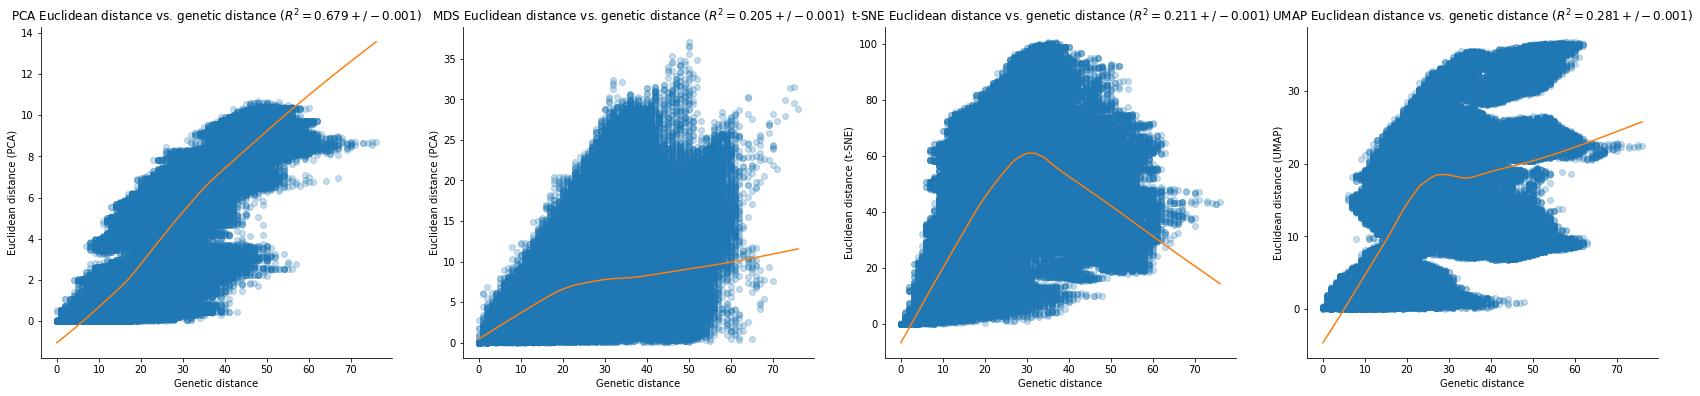

In [126]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP Euclidean distance vs. genetic distance ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [273]:
Genetic_KDE_df_ha = pd.read_csv("results/KDEDensity_genetic_ha.csv",index_col=0)
Genetic_KDE_df_concatenated = pd.read_csv("results/KDEDensity_genetic_concatenated.csv",index_col=0)
Genetic_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_genetic_metadata_ha.csv", index_col=0)
Genetic_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_genetic_metadata_concatenated.csv", index_col=0)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [274]:
PCA_KDE_df_ha = pd.read_csv("results/KDEDensity_pca_ha.csv",index_col=0)
PCA_KDE_df_concatenated = pd.read_csv("results/KDEDensity_pca_concatenated.csv",index_col=0)
PCA_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_pca_metadata_ha.csv", index_col=0)
PCA_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_pca_metadata_concatenated.csv", index_col=0)

MDS_KDE_df_ha = pd.read_csv("results/KDEDensity_mds_ha.csv",index_col=0)
MDS_KDE_df_concatenated = pd.read_csv("results/KDEDensity_mds_concatenated.csv",index_col=0)
MDS_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_mds_metadata_ha.csv", index_col=0)
MDS_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_mds_metadata_concatenated.csv", index_col=0)

TSNE_KDE_df_ha = pd.read_csv("results/KDEDensity_t-sne_ha.csv",index_col=0)
TSNE_KDE_df_concatenated = pd.read_csv("results/KDEDensity_t-sne_concatenated.csv",index_col=0)
TSNE_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_t-sne_metadata_ha.csv", index_col=0)
TSNE_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_t-sne_metadata_concatenated.csv", index_col=0)

UMAP_KDE_df_ha = pd.read_csv("results/KDEDensity_umap_ha.csv",index_col=0)
UMAP_KDE_df_concatenated = pd.read_csv("results/KDEDensity_umap_concatenated.csv",index_col=0)
UMAP_KDE_metadata_df_ha = pd.read_csv("results/KDEDensity_umap_metadata_ha.csv", index_col=0)
UMAP_KDE_metadata_df_concatenated = pd.read_csv("results/KDEDensity_umap_metadata_concatenated.csv", index_col=0)

In [275]:
import matplotlib.gridspec as gridspec

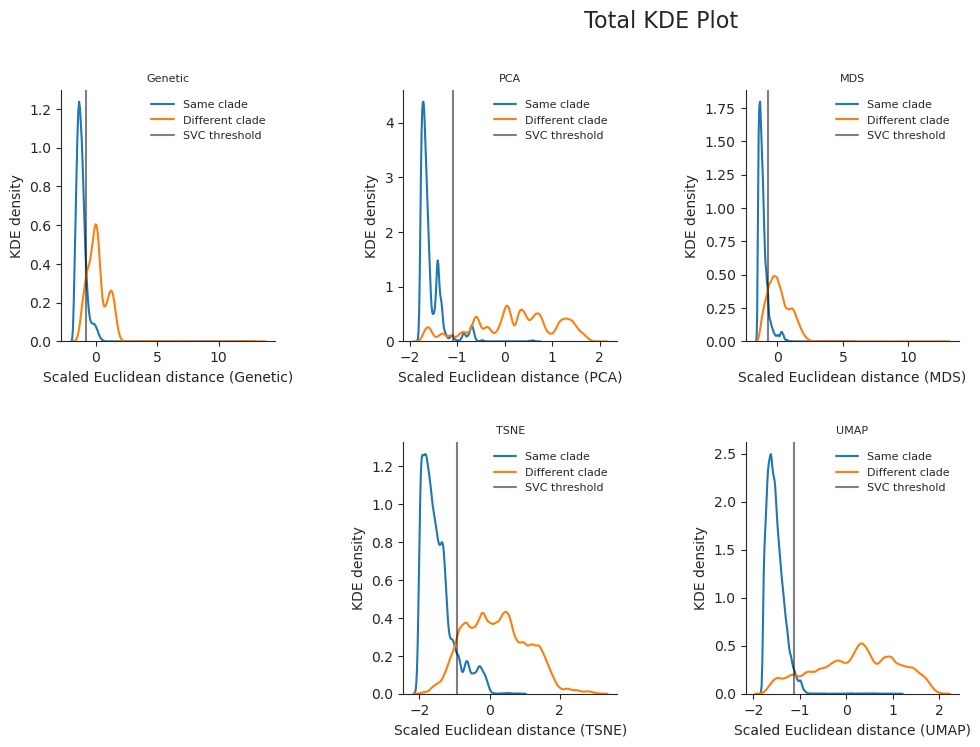

In [284]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df_ha.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df_ha["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")


fig.suptitle('Total KDE Plot', fontsize=16)
sns.despine()
plt.savefig("../docs/FinalHAKDEPlot.png", dpi=600, bbox_inches='tight')

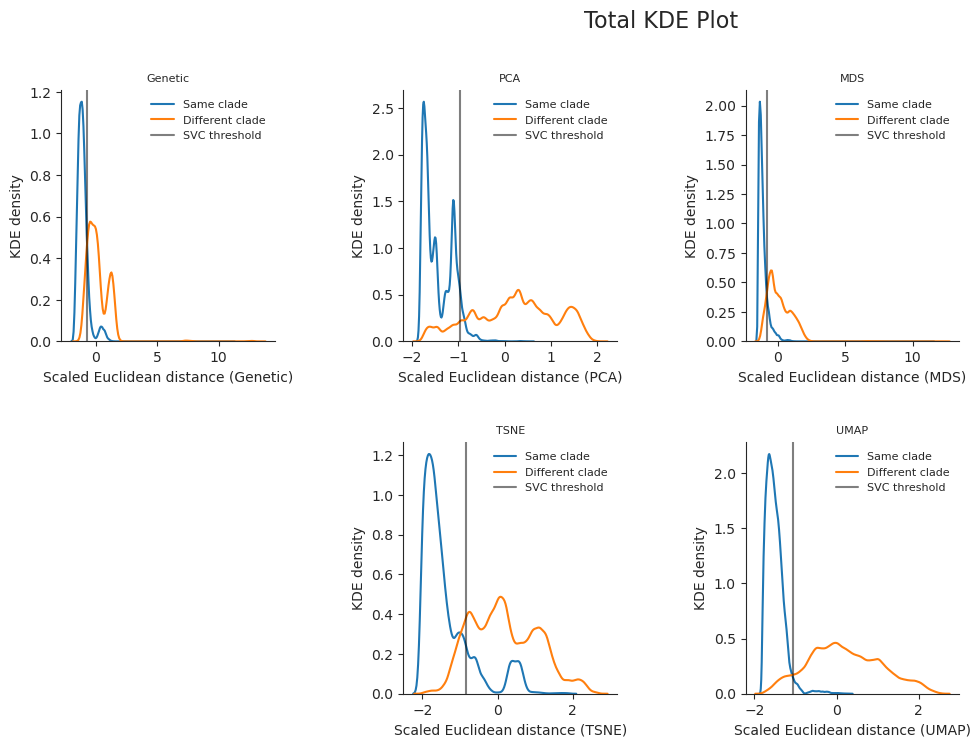

In [283]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df_concatenated.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df_concatenated["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")


fig.suptitle('Total KDE Plot', fontsize=16)
sns.despine()
plt.savefig("../docs/FinalCONCATKDEPlot.png", dpi=600, bbox_inches='tight')

# Supplemental Figures

In [45]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds' + str(i) for i in range(1,11)],['MDS' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.MDS_Supplement)
save(chart, snakemake.output.MDS_Supplement_PNG)

In [46]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)